## LQTMOMENT Tutorial 4: Data Analysis with LqtAnalysis

Before using `lqt_analysis` module, you need to prepare your `lqtmoment-formatted catalog`, as demonstrated in [lqt_tutor_1_catalog_builder](https://github.com/bgjx/lqt-moment-magnitude/blob/main/lqt-tutorials/lqt_tutor_1_catalog_builder.ipynb). The new data field, `magnitude`, will automatically be included in the catalog after running the program for magnitude calculation. You can then work with this field in `LqtAnalysis` class. However, `LqtAnalysis` can still parse the `lqtmoment-formatted catalog` even if you haven't calculated the moment magnitude first.

### 1. Import all the necessary modules from the **lqt_analysis** module.

In [6]:
from lqtmoment.lqt_analysis import load_catalog, LqtAnalysis, Statistic
import pandas as pd

> **ℹ️ INFO ℹ️**
> 
> From `lqt_analysis`, we need to import `load_catalog` module to load the `lqtmoment-formatted catalog` in `.csv` or `.xlsx` (`.csv` format is preferred). This module will return an `LqtAnalysis` class instance. 
>
> You can absolutely generate `LqtAnalysis` class instance by inputing `lqtmoment-formatted` pandas DataFrame if you prefer to streamline your data in a DataFrame object. 
>
> The last module we need to import is the `Statistic` class, which is a helper `enum class` used to specify the statistical analysis you want `LqtAnalysis` to perform.
> 
>

### 2. Create LqtAnalysis Class Object

#### A. From A lqtmoment Catalog File (.csv or .xlsx)

To create `LqtAnalysis` class instance from a file, first you need to prepare the directory of that file and use `load_catalog` to load the file and it will return the `LqtAnalysis` class object.

In [7]:
# Get the lqt catalog directory
catalog_dir = r"C:\Users\arham zakki edelo\lqt-tutorials\lqt-tutorials\run lqt moment\result_test.csv"

# Load the catalog
lqt_ready = load_catalog(catalog_dir)

# Check first 5 rows using head method
lqt_ready.head()

,Unnamed: 0,source_id,source_lat,source_lon,source_depth_m,magnitude,network_code,station_code,station_lat,station_lon,...,s_p_lag_time_sec,coda_time,source_err_rms_s,n_phases,gap_degree,x_horizontal_err_m,y_horizontal_err_m,z_depth_err_m,earthquake_type,remarks
0,0,2000,38.244364,126.369385,-873.30,0.431429,KJ,KJ09,38.224820,126.364433,...,0.537087,NaN,0.010497,6.0,321.498,1001.074098,553.533887,1125.534873,very_local_earthquake,NaN
1,1,2000,38.244364,126.369385,-873.30,0.431429,KJ,KJ06,38.212581,126.379951,...,0.819840,NaN,0.010497,6.0,321.498,1001.074098,553.533887,1125.534873,very_local_earthquake,NaN
2,2,2000,38.244364,126.369385,-873.30,0.431429,KJ,KJ05,38.203970,126.378906,...,0.994110,NaN,0.010497,6.0,321.498,1001.074098,553.533887,1125.534873,very_local_earthquake,NaN
3,3,2001,38.201387,126.357560,1258.86,1.060108,KJ,KJ05,38.203970,126.378906,...,0.751148,NaN,0.055488,12.0,282.688,454.228142,469.387846,548.388115,very_local_earthquake,NaN
4,4,2001,38.201387,126.357560,1258.86,1.060108,KJ,KJ06,38.212581,126.379951,...,0.762638,NaN,0.055488,12.0,282.688,454.228142,469.387846,548.388115,very_local_earthquake,NaN


#### B. From A Catalog DataFrame

Let's say that after using `magnitude_estimator` API, as we have demonstrated in [lqt_tutor_3_moment_mag_calculation](https://github.com/bgjx/lqt-moment-magnitude/blob/main/lqt-tutorials/lqt_tutor_3_moment_mag_calculation.ipynb), you want to use the `merged` catalog as the result of your moment magnitude calculation for immediate data analysis. In that case,  you can directly create `LqtAnalyais` class instance like this:

In [8]:
# Let's pretend this catalog_df is the merged catalog resulting from magnitude_estimator module
catalog_df = pd.read_csv(catalog_dir)

# Then we can create LqtAnalysis class instance object with.
lqt_ready_2 = LqtAnalysis(catalog_df)

# Check first 5 rows using head method
lqt_ready_2.head(5)

,Unnamed: 0,source_id,source_lat,source_lon,source_depth_m,magnitude,network_code,station_code,station_lat,station_lon,...,s_p_lag_time_sec,coda_time,source_err_rms_s,n_phases,gap_degree,x_horizontal_err_m,y_horizontal_err_m,z_depth_err_m,earthquake_type,remarks
0,0,2000,38.244364,126.369385,-873.30,0.431429,KJ,KJ09,38.224820,126.364433,...,0.537087,NaN,0.010497,6.0,321.498,1001.074098,553.533887,1125.534873,very_local_earthquake,NaN
1,1,2000,38.244364,126.369385,-873.30,0.431429,KJ,KJ06,38.212581,126.379951,...,0.819840,NaN,0.010497,6.0,321.498,1001.074098,553.533887,1125.534873,very_local_earthquake,NaN
2,2,2000,38.244364,126.369385,-873.30,0.431429,KJ,KJ05,38.203970,126.378906,...,0.994110,NaN,0.010497,6.0,321.498,1001.074098,553.533887,1125.534873,very_local_earthquake,NaN
3,3,2001,38.201387,126.357560,1258.86,1.060108,KJ,KJ05,38.203970,126.378906,...,0.751148,NaN,0.055488,12.0,282.688,454.228142,469.387846,548.388115,very_local_earthquake,NaN
4,4,2001,38.201387,126.357560,1258.86,1.060108,KJ,KJ06,38.212581,126.379951,...,0.762638,NaN,0.055488,12.0,282.688,454.228142,469.387846,548.388115,very_local_earthquake,NaN


### 3. Perform Some Statistics

Using the `LqtAnalysis` class instance object, you can perform various statistical analysis to help evaluate your data. You can calculate statistics for any column in your catalog, and we provide the following list of available statistical methods:

- **MEAN**
- **MEDIAN**
- **STD**
- **MIN**
- **MAX**
- **DESCRIBE**

In [9]:
# Let's do some basic statistic here
mean_magnitude = lqt_ready_2.compute_statistic('magnitude', Statistic.MEAN)
print(f"The mean of magnitude is {mean_magnitude}")

max_magnitude = lqt_ready_2.compute_statistic('magnitude', Statistic.MAX)
print(f"The maximum value of magnitude is {max_magnitude}")

# Or you can also use DESCRIBE
describe = lqt_ready_2.compute_statistic('magnitude', Statistic.DESCRIBE)
print(f"Here the statistical description of the data: \n{describe}")

The mean of magnitude is 0.6425889431226027
The maximum value of magnitude is 2.171243526133633
Here the statistical description of the data: 
count    766.000000
mean       0.642589
std        0.378217
min       -0.183738
25%        0.386897
50%        0.605232
75%        0.867390
max        2.171244
Name: magnitude, dtype: float64


### 4. Plotting Histogram

Using the `LqtAnalysis` class instance object, you can also plot the histogram for any given numerical columns:

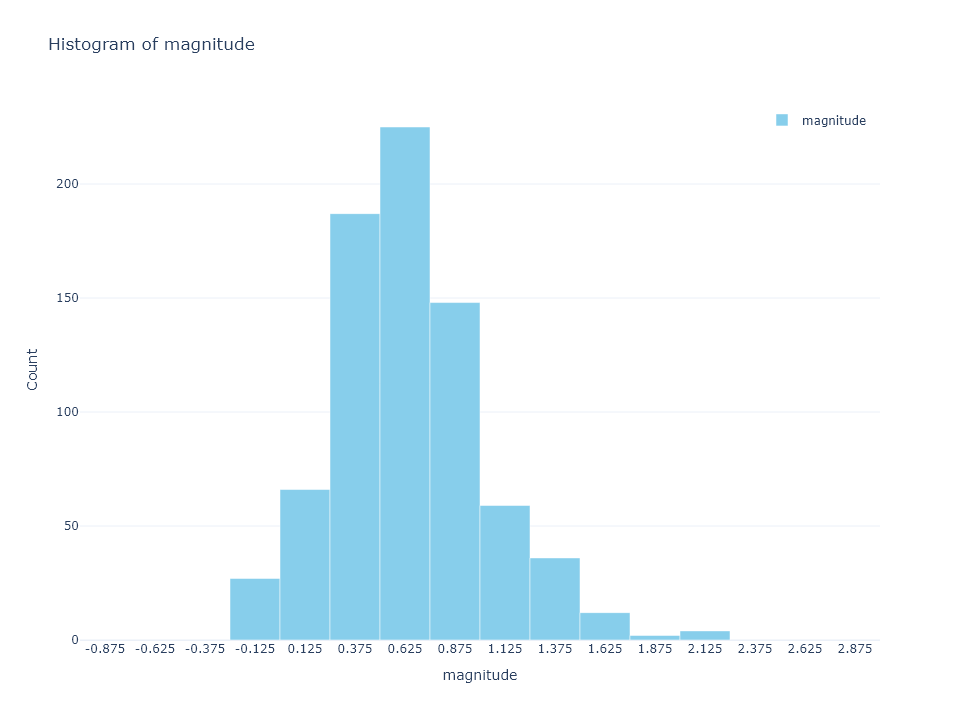

In [10]:
# setting plotly for static render (delete this import and the render setting in your own scripts to experience plotly interactive, this is just for github deployment in this tutorial)
import plotly.io as pio
pio.renderers.default = 'png'  # or 'svg'

# Example of using plot_histogram method
lqt_ready_2.plot_histogram('magnitude', bin_width=0.25, min_bin=-1.0, max_bin=3.0)

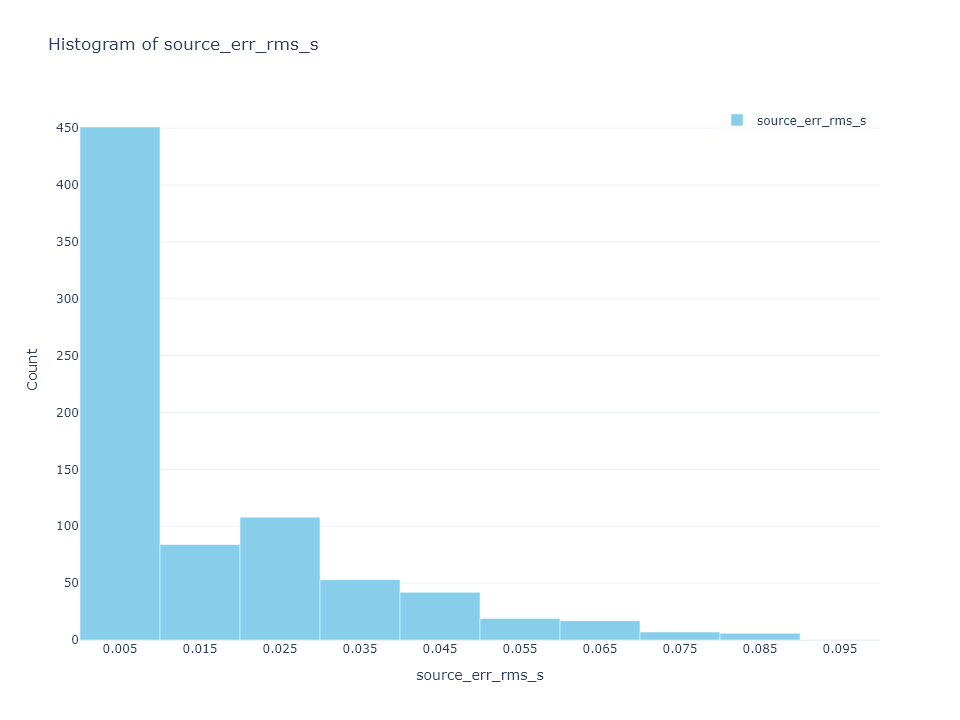

In [11]:
# Another example using different columns
lqt_ready_2.plot_histogram('source_err_rms_s', 0.01, max_bin=0.1)

### 5. Plotting Hypocenters in 2D and 3D Plot

We also provide hypocenter plots in both 2D and 3D to make data analysis easier for you.

A. 2D Hypocenter Plot

To plot your hypocenter in 2D plane we can use `plot_hypocenter_2D` class method.

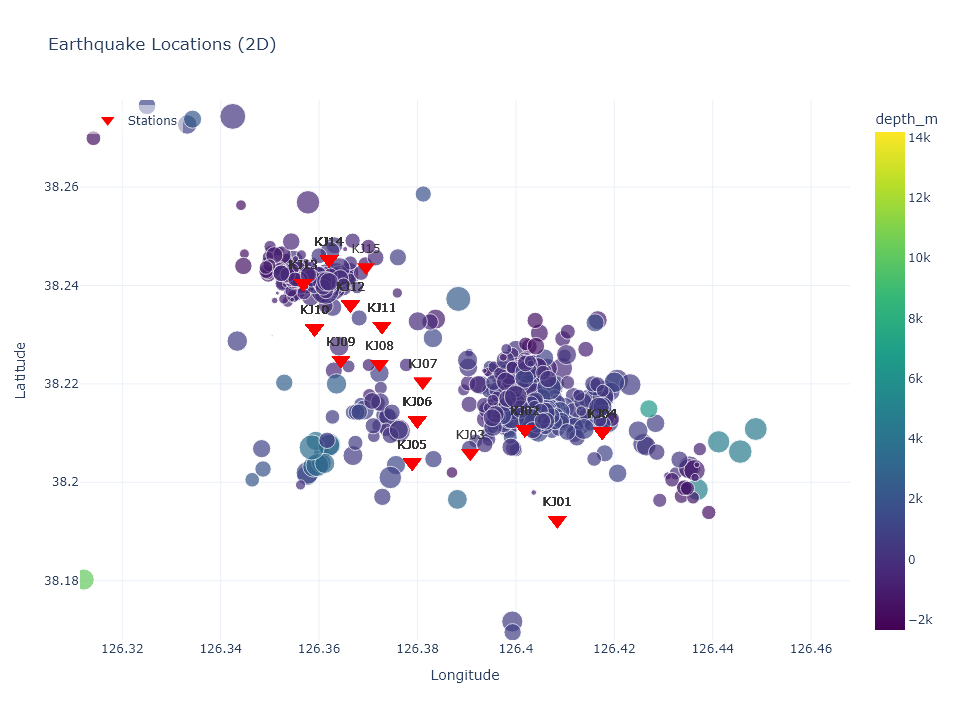

In [12]:
# 2D plot
lqt_ready_2.plot_hypocenter_2d()

A. 3D Hypocenter Plot

To plot your hypocenter in 3D we can use `plot_hypocenter_3D` class method.

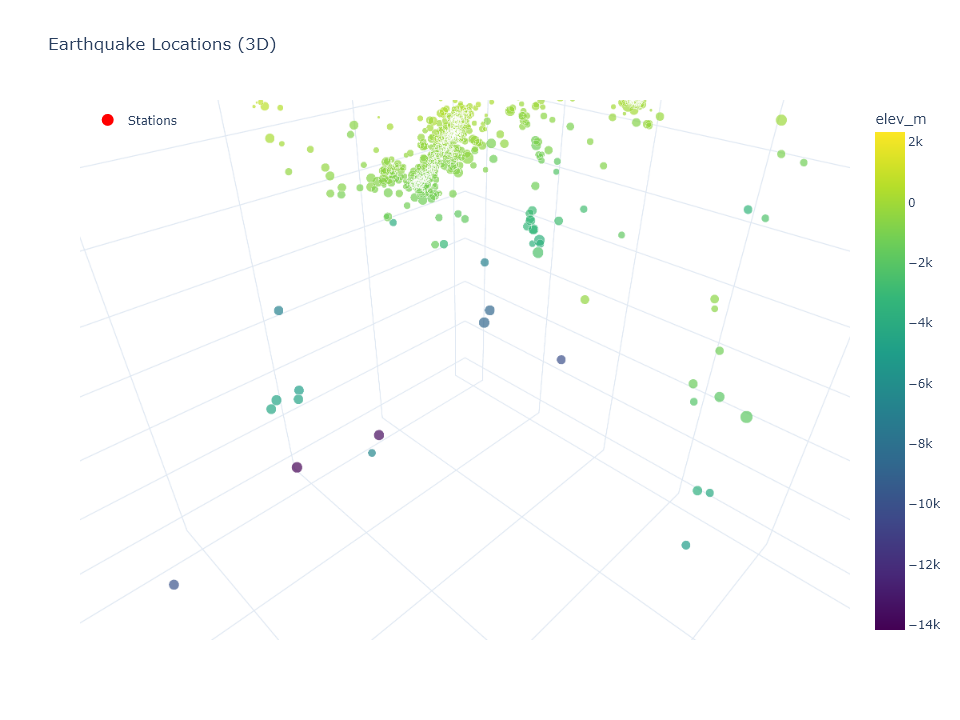

In [13]:
# 3D Plot
lqt_ready_2.plot_hypocenter_3d()

### 6. Plotting Earthquake Intensities

With `LqtAnalysis` class instances object you can also calculate and plot the earthquake intensity in specific time interval (e.g., `yearly`, `monthly`, `weekly`, `daily`, and `hourly`) by using `plot_intensity` class method.

**A. Yearly, Monthly, and Weekly Intensities**

If you have a long period dataset that spans months or years, the `plot_intensity` class method provides you options to view earthquake intensities at yearly and monthly intervals, allowing you to analyze the historical trends in your earthquake data over time.

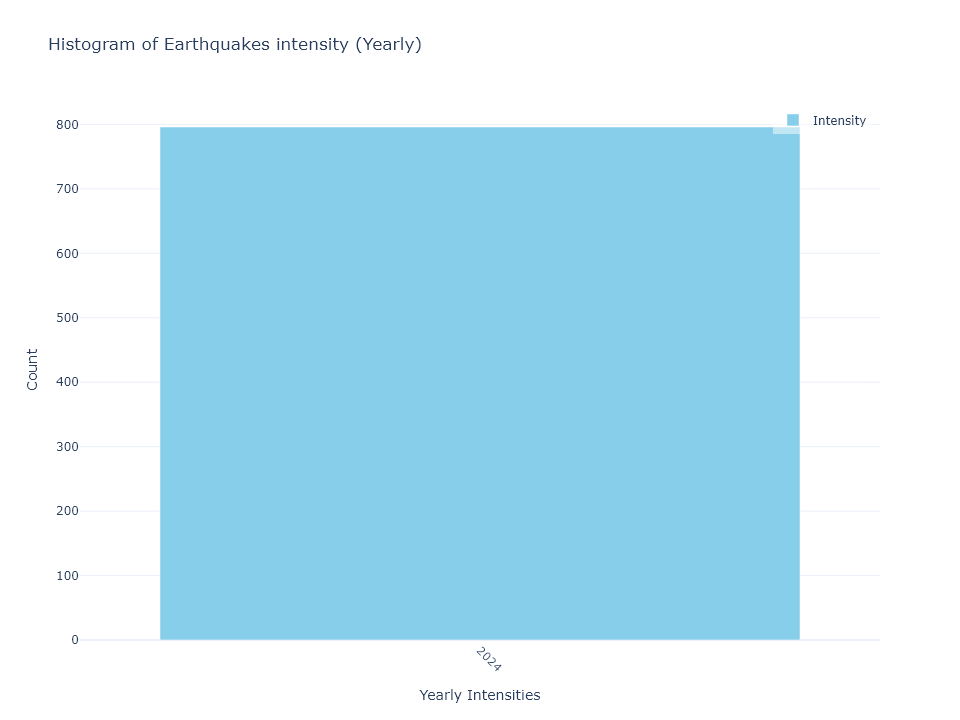

In [14]:
# Plot earthquakes intensity by Year
lqt_ready_2.plot_intensity(interval='yearly')

Since our example datasets only in year 2024, so only one bar of histogram appears in the plot.

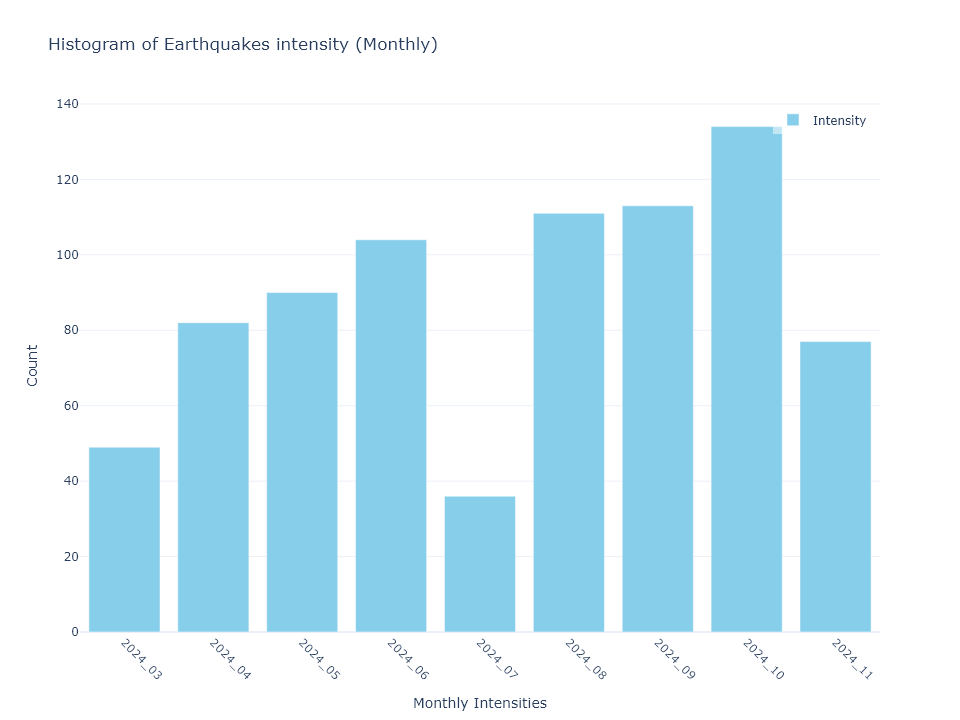

In [15]:
# Plot earthquakes intensity by Month
lqt_ready_2.plot_intensity(interval='monthly')

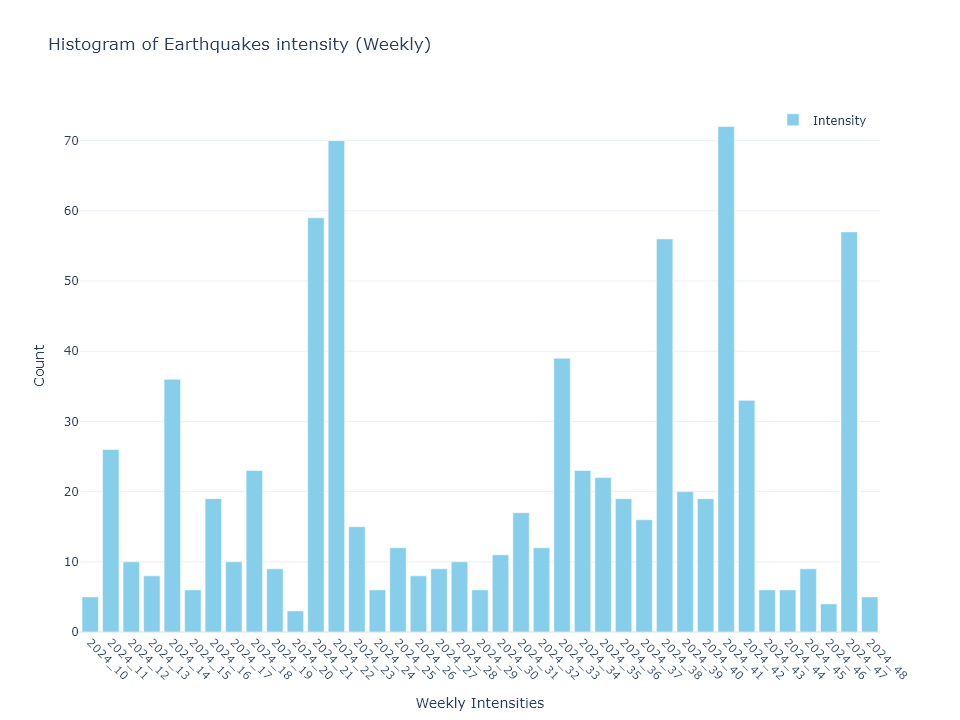

In [16]:
# Plot earthquakes intensity by Week
lqt_ready_2.plot_intensity(interval='weekly')

**A. Daily and Hourly Intensities**

Suppose you want higher-resolution detail and need to view earthquake intensities in Daily or Hourly intervals — the `plot_intensity` function can definitely handle that. However, the resulting histogram may be difficult to interpret. That's why the `LqtAnalysis` class also includes the `window_time` class method, which allows you to trim or narrow your dataset to a specific time period or interval.

**DATA WINDOWING**

In [17]:
# Trim and create new windowed `LqtAnalysis` class instance using `window_time` class method.
windowed_lqt_df = lqt_ready_2.window_time('2024-04-01 00:00:00', '2024-05-01 00:00:00') # the return is a subset pandas DataFrame

# And then, you can make new `LqtAnalysis` class instance object, this approach make sure you will not modify the original DataFrame so you are safe
windowed_lqt_analysis = LqtAnalysis(windowed_lqt_df)
windowed_lqt_analysis.head(10)

,Unnamed: 0,source_id,source_lat,source_lon,source_depth_m,magnitude,network_code,station_code,station_lat,station_lon,...,s_p_lag_time_sec,coda_time,source_err_rms_s,n_phases,gap_degree,x_horizontal_err_m,y_horizontal_err_m,z_depth_err_m,earthquake_type,remarks
266,266,2049,38.210484,126.376188,218.0,1.414427,KJ,KJ06,38.212581,126.379951,...,0.458986,NaN,0.012359,24.0,159.671,267.290148,160.704179,150.29097,very_local_earthquake,NaN
267,267,2049,38.210484,126.376188,218.0,1.414427,KJ,KJ05,38.203970,126.378906,...,0.519529,NaN,0.012359,24.0,159.671,267.290148,160.704179,150.29097,very_local_earthquake,NaN
268,268,2049,38.210484,126.376188,218.0,1.414427,KJ,KJ07,38.220451,126.381069,...,0.553817,NaN,0.012359,24.0,159.671,267.290148,160.704179,150.29097,very_local_earthquake,NaN
269,269,2049,38.210484,126.376188,218.0,1.414427,KJ,KJ08,38.224050,126.372253,...,0.580234,NaN,0.012359,24.0,159.671,267.290148,160.704179,150.29097,very_local_earthquake,NaN
270,270,2049,38.210484,126.376188,218.0,1.414427,KJ,KJ02,38.210773,126.401842,...,0.721065,NaN,0.012359,24.0,159.671,267.290148,160.704179,150.29097,very_local_earthquake,NaN
271,271,2049,38.210484,126.376188,218.0,1.414427,KJ,KJ09,38.224820,126.364433,...,0.686675,NaN,0.012359,24.0,159.671,267.290148,160.704179,150.29097,very_local_earthquake,NaN
272,272,2049,38.210484,126.376188,218.0,1.414427,KJ,KJ11,38.231774,126.372777,...,0.767830,NaN,0.012359,24.0,159.671,267.290148,160.704179,150.29097,very_local_earthquake,NaN
273,273,2049,38.210484,126.376188,218.0,1.414427,KJ,KJ01,38.192293,126.408419,...,0.773701,NaN,0.012359,24.0,159.671,267.290148,160.704179,150.29097,very_local_earthquake,NaN
274,274,2049,38.210484,126.376188,218.0,1.414427,KJ,KJ12,38.236119,126.366364,...,0.888177,NaN,0.012359,24.0,159.671,267.290148,160.704179,150.29097,very_local_earthquake,NaN
275,275,2049,38.210484,126.376188,218.0,1.414427,KJ,KJ13,38.240449,126.356779,...,0.969030,NaN,0.012359,24.0,159.671,267.290148,160.704179,150.29097,very_local_earthquake,NaN


**PLOTTING WITH TIME WINDOWED DATA**

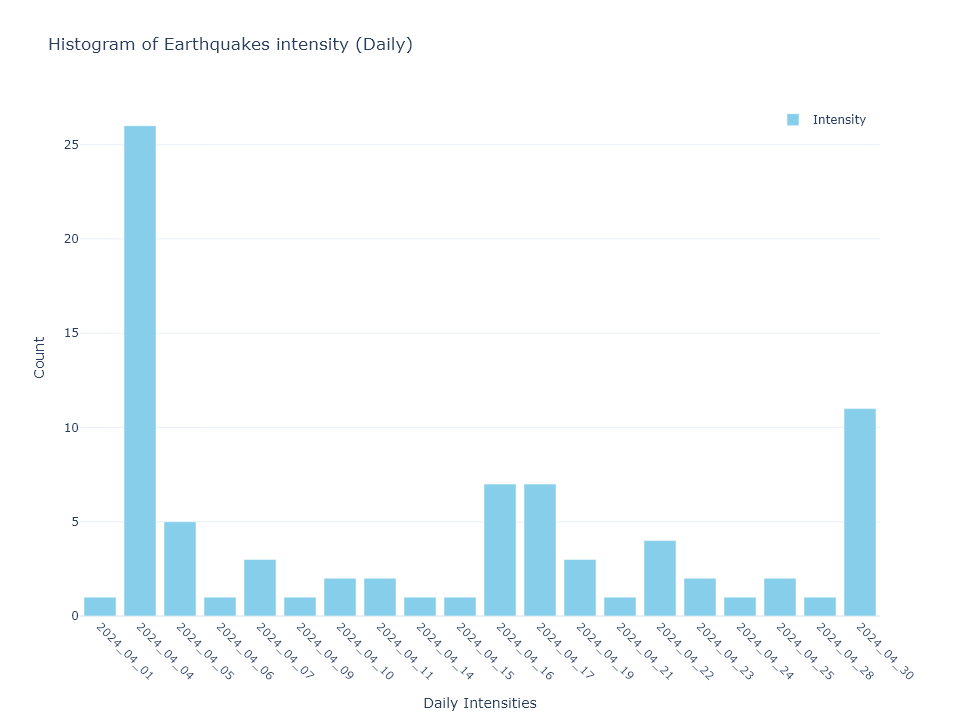

In [18]:
# Plot new daily intensities using the windowed dataframe
windowed_lqt_analysis.plot_intensity(interval='daily')

For `hourly` intensities, you may want even more detailed insights, so at this resolution, it's reasonable to window your data to a narrower range, for example, just 2 days.

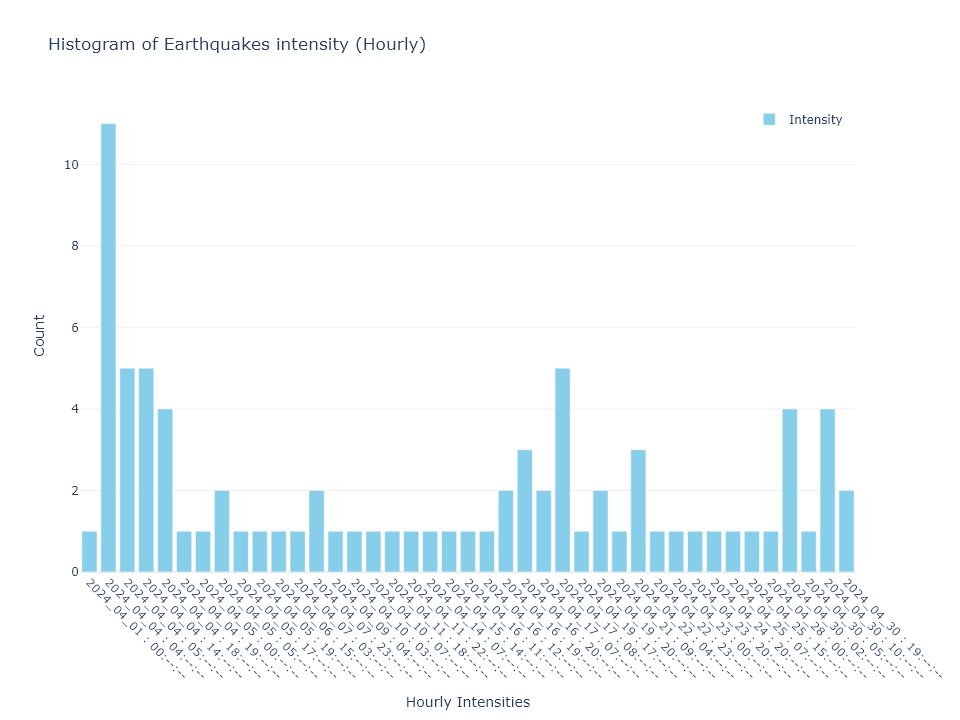

In [19]:
# Trim and create new windowed `LqtAnalysis` class instance using `window_time` class method.
windowed_lqt_df_2 = lqt_ready_2.window_time('2024-04-01 00:00:00', '2024-04-03 00:00:00')
windowed_lqt_analysis_2 = LqtAnalysis(windowed_lqt_df)

# Plot new daily intensities using the windowed dataframe
windowed_lqt_analysis_2.plot_intensity(interval='hourly')

### 7. Gutenberg-Richter Analysis

Creating a Gutenberg-Richter plot is useful tools for understanding the relationship between earthquake magnitude and the frequency of earthquake occurrences. From this plot, we can derive the `b-value`, `a-value`, and `magnitude completeness`, which are crucial for interpreting the data, assessing seismic hazard, and evaluating the perceptibility of the sensors used for magnitude monitoring.

To do this, `LqtAnalysis` class provides the `gutenberg_richter` method, which performs the calculations, creates the plot, and fits the trend-line automatically with systematic search.

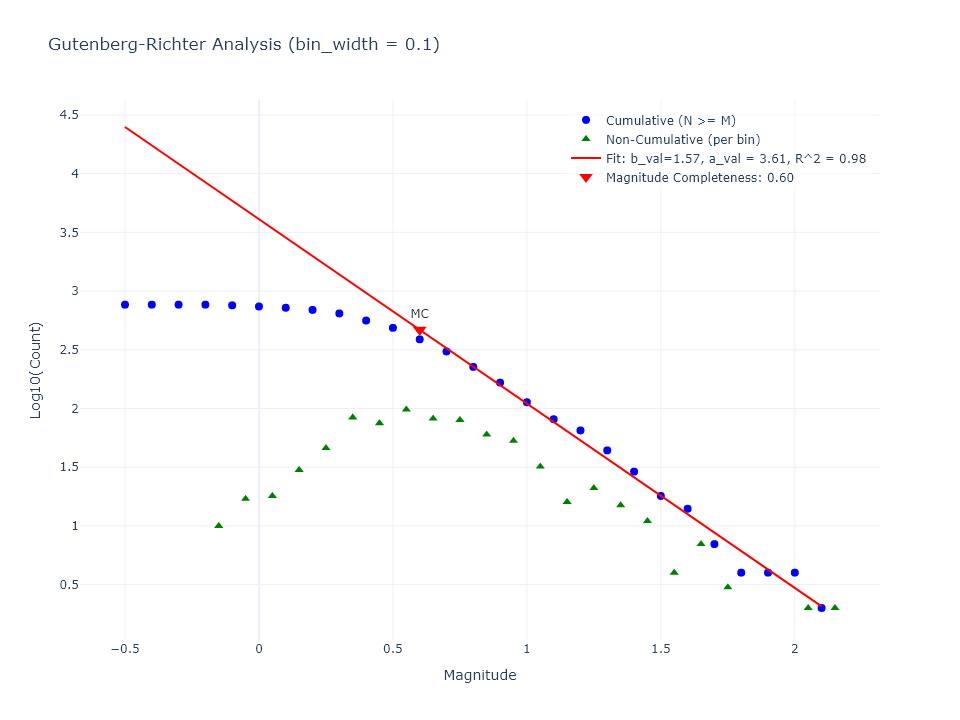

{'b_value': 1.570017873174488,
 'a_value': 3.6121994864791196,
 'b_value_stderr': 0.04266426122064275,
 'r_squared': 0.9796397623084806,
 'result_data':     magnitude  log_cumulative_count  log_non_cumulative_count
 0       -0.45              2.884229                  1.000000
 1       -0.35              2.884229                  1.230449
 2       -0.25              2.884229                  1.255273
 3       -0.15              2.884229                  1.477121
 4       -0.05              2.878522                  1.662758
 5        0.05              2.868644                  1.924279
 6        0.15              2.857935                  1.875061
 7        0.25              2.839478                  1.991226
 8        0.35              2.809560                  1.913814
 9        0.45              2.748963                  1.903090
 10       0.55              2.686636                  1.778151
 11       0.65              2.588832                  1.724276
 12       0.75              2

In [20]:
# Create Gutenberg-richter plot
lqt_ready_2.gutenberg_richter(min_magnitude=-0.5,bin_width=0.1, plot=True)

### 8. Select a Region from the Datasets.

When performing spatial data analysis, it is common to select a specific region of interest or conduct cluster analysis to gain more insights specific to that area. Using the `area_rectangle` and `area_circular` methods from the `LqtAnalysis` class, you can easily accomplish this. 

Simply provide the borders of the rectangular area or the center and radius for the circular area, and the methods will return a new DataFrame containing the subset of the dataset confined to the specified region.

##### A. Select Rectangle Area

In [21]:
# Draw area rectangle by providing the rectangle borders
subset_area_df = lqt_ready_2.area_rectangle(
                                        min_latitude=38.225,
                                        max_latitude=38.260,
                                        min_longitude=126.340,
                                        max_longitude=126.380,
)

# Make new LqtAnalysis class instance using this subset df
new_subset_area_lqt = LqtAnalysis(subset_area_df)
new_subset_area_lqt.head(10)

,Unnamed: 0,source_id,source_lat,source_lon,source_depth_m,magnitude,network_code,station_code,station_lat,station_lon,...,s_p_lag_time_sec,coda_time,source_err_rms_s,n_phases,gap_degree,x_horizontal_err_m,y_horizontal_err_m,z_depth_err_m,earthquake_type,remarks
0,0,2000,38.244364,126.369385,-873.300,0.431429,KJ,KJ09,38.224820,126.364433,...,0.537087,NaN,0.010497,6.0,321.498,1001.074098,553.533887,1125.534873,very_local_earthquake,NaN
1,1,2000,38.244364,126.369385,-873.300,0.431429,KJ,KJ06,38.212581,126.379951,...,0.819840,NaN,0.010497,6.0,321.498,1001.074098,553.533887,1125.534873,very_local_earthquake,NaN
2,2,2000,38.244364,126.369385,-873.300,0.431429,KJ,KJ05,38.203970,126.378906,...,0.994110,NaN,0.010497,6.0,321.498,1001.074098,553.533887,1125.534873,very_local_earthquake,NaN
20,20,2004,38.233423,126.379041,-2730.357,NaN,KJ,KJ09,38.224820,126.364433,...,0.470382,NaN,0.022159,8.0,297.885,963.236835,773.610154,1210.829402,very_local_earthquake,NaN
21,21,2004,38.233423,126.379041,-2730.357,NaN,KJ,KJ06,38.212581,126.379951,...,0.642059,NaN,0.022159,8.0,297.885,963.236835,773.610154,1210.829402,very_local_earthquake,NaN
22,22,2004,38.233423,126.379041,-2730.357,NaN,KJ,KJ05,38.203970,126.378906,...,0.907295,NaN,0.022159,8.0,297.885,963.236835,773.610154,1210.829402,very_local_earthquake,NaN
23,23,2004,38.233423,126.379041,-2730.357,NaN,KJ,KJ02,38.210773,126.401842,...,1.504001,NaN,0.022159,8.0,297.885,963.236835,773.610154,1210.829402,very_local_earthquake,NaN
24,24,2005,38.240433,126.364087,-265.140,0.964486,KJ,KJ14,38.245280,126.362021,...,0.465420,NaN,0.025924,14.0,160.259,612.538733,440.734299,306.344851,very_local_earthquake,NaN
25,25,2005,38.240433,126.364087,-265.140,0.964486,KJ,KJ12,38.236119,126.366364,...,0.476112,NaN,0.025924,14.0,160.259,612.538733,440.734299,306.344851,very_local_earthquake,NaN
26,26,2005,38.240433,126.364087,-265.140,0.964486,KJ,KJ09,38.224820,126.364433,...,0.497650,NaN,0.025924,14.0,160.259,612.538733,440.734299,306.344851,very_local_earthquake,NaN


And performs some analysis using this new subsets of data.

In [22]:
# Calculate statistic from clustered data
new_subset_area_lqt.compute_statistic("magnitude", Statistic.MEAN) 

0.5588407291318986

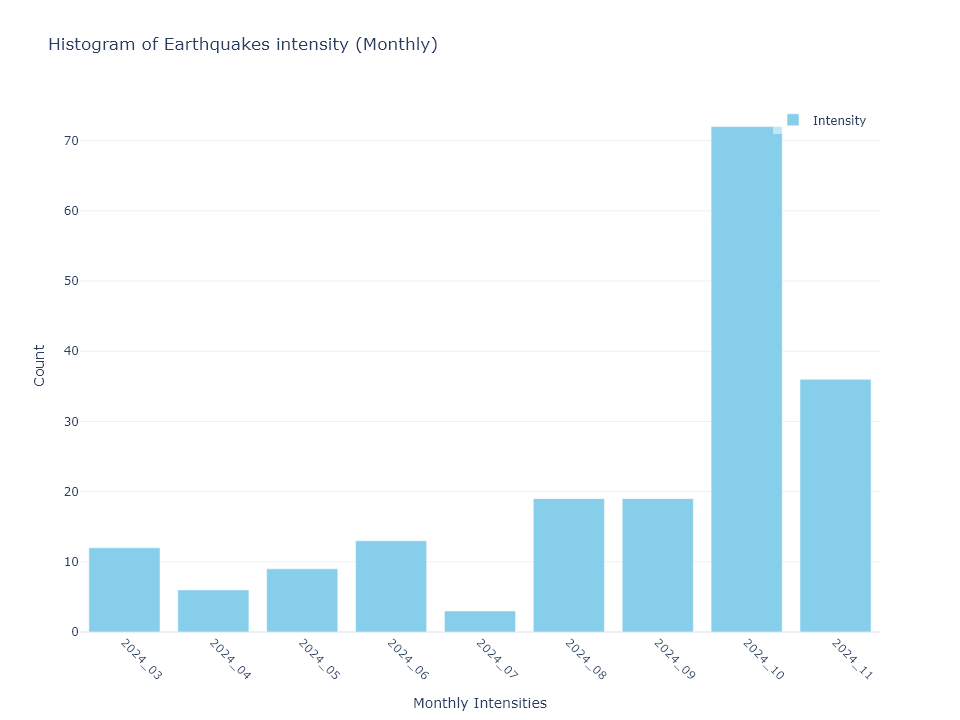

In [23]:
# Plot Monthly Intensities
new_subset_area_lqt.plot_intensity('monthly')

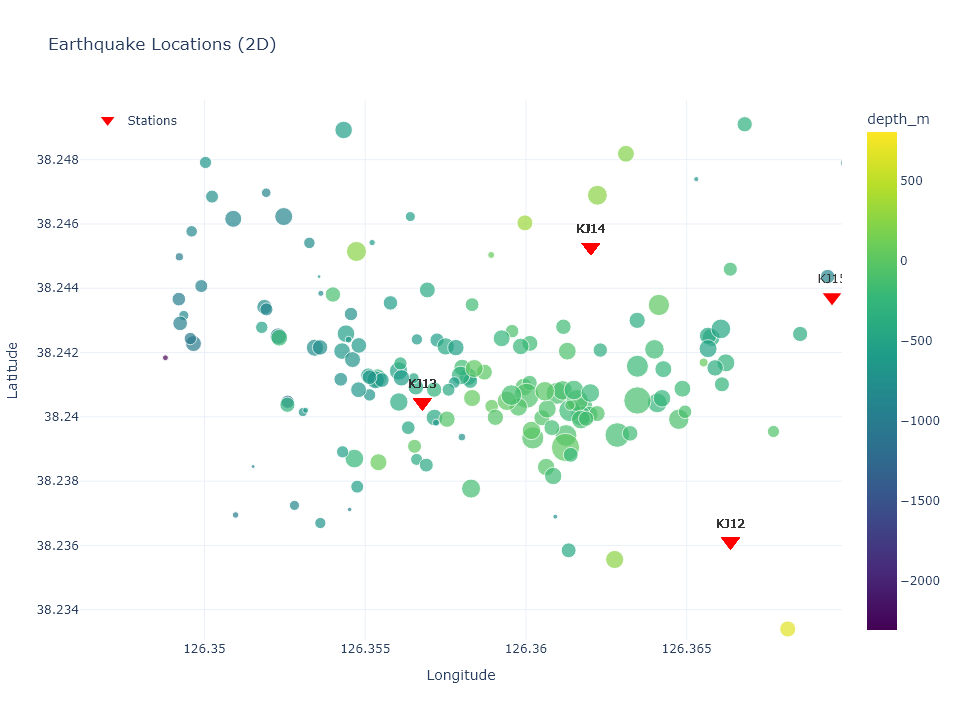

In [24]:
# Plot hypocenters 2D
new_subset_area_lqt.plot_hypocenter_2d()

##### B. Select Circular Area

In [25]:
# Draw circular are by providing the center point and radius
new_circular_area_df = lqt_ready_2.area_circular(
                                    center_latitude=38.2435,
                                    center_longitude=126.3555,
                                    radius=3
                                    )

# Make new LqtAnalysis class instance using this subset df
new_circular_area_lqt = LqtAnalysis(new_circular_area_df)
new_circular_area_lqt.head(10)

,Unnamed: 0,source_id,source_lat,source_lon,source_depth_m,magnitude,network_code,station_code,station_lat,station_lon,...,s_p_lag_time_sec,coda_time,source_err_rms_s,n_phases,gap_degree,x_horizontal_err_m,y_horizontal_err_m,z_depth_err_m,earthquake_type,remarks
0,0,2000,38.244364,126.369385,-873.300,0.431429,KJ,KJ09,38.224820,126.364433,...,0.537087,NaN,0.010497,6.0,321.498,1001.074098,553.533887,1125.534873,very_local_earthquake,NaN
1,1,2000,38.244364,126.369385,-873.300,0.431429,KJ,KJ06,38.212581,126.379951,...,0.819840,NaN,0.010497,6.0,321.498,1001.074098,553.533887,1125.534873,very_local_earthquake,NaN
2,2,2000,38.244364,126.369385,-873.300,0.431429,KJ,KJ05,38.203970,126.378906,...,0.994110,NaN,0.010497,6.0,321.498,1001.074098,553.533887,1125.534873,very_local_earthquake,NaN
20,20,2004,38.233423,126.379041,-2730.357,NaN,KJ,KJ09,38.224820,126.364433,...,0.470382,NaN,0.022159,8.0,297.885,963.236835,773.610154,1210.829402,very_local_earthquake,NaN
21,21,2004,38.233423,126.379041,-2730.357,NaN,KJ,KJ06,38.212581,126.379951,...,0.642059,NaN,0.022159,8.0,297.885,963.236835,773.610154,1210.829402,very_local_earthquake,NaN
22,22,2004,38.233423,126.379041,-2730.357,NaN,KJ,KJ05,38.203970,126.378906,...,0.907295,NaN,0.022159,8.0,297.885,963.236835,773.610154,1210.829402,very_local_earthquake,NaN
23,23,2004,38.233423,126.379041,-2730.357,NaN,KJ,KJ02,38.210773,126.401842,...,1.504001,NaN,0.022159,8.0,297.885,963.236835,773.610154,1210.829402,very_local_earthquake,NaN
24,24,2005,38.240433,126.364087,-265.140,0.964486,KJ,KJ14,38.245280,126.362021,...,0.465420,NaN,0.025924,14.0,160.259,612.538733,440.734299,306.344851,very_local_earthquake,NaN
25,25,2005,38.240433,126.364087,-265.140,0.964486,KJ,KJ12,38.236119,126.366364,...,0.476112,NaN,0.025924,14.0,160.259,612.538733,440.734299,306.344851,very_local_earthquake,NaN
26,26,2005,38.240433,126.364087,-265.140,0.964486,KJ,KJ09,38.224820,126.364433,...,0.497650,NaN,0.025924,14.0,160.259,612.538733,440.734299,306.344851,very_local_earthquake,NaN


Let's create a 2D plot to visualize how it might look.

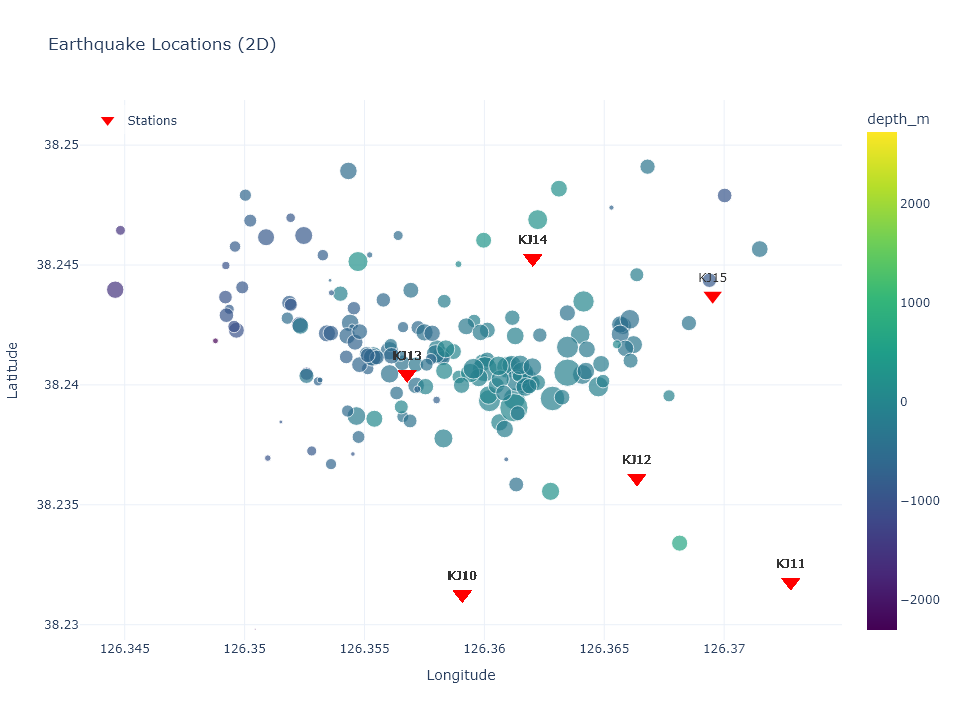

In [26]:
# Plot hypocenters 2D
new_circular_area_lqt.plot_hypocenter_2d()